In [35]:
%pip install import-ipynb


Note: you may need to restart the kernel to use updated packages.


In [25]:
import import_ipynb
import data_preprocessing


In [26]:
data_preprocessing.df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num,thal_3.0,thal_6.0,thal_7.0
0,0.948726,1.0,1.0,0.75,-0.125000,1.0,2.0,0.017197,0.0,0.9375,3.0,0.0,0,0.0,1.0,0.0
1,1.392002,1.0,4.0,1.50,0.703125,0.0,2.0,-1.821905,1.0,0.4375,2.0,3.0,2,1.0,0.0,0.0
2,1.392002,1.0,4.0,-0.50,-0.187500,0.0,2.0,-0.902354,1.0,1.1250,2.0,2.0,1,0.0,0.0,1.0
3,-1.932564,1.0,3.0,0.00,0.140625,0.0,0.0,1.637359,0.0,1.6875,3.0,0.0,0,1.0,0.0,0.0
4,-1.489288,0.0,2.0,0.00,-0.578125,0.0,2.0,0.980537,0.0,0.3750,1.0,0.0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,1.0,1.0,-1.00,0.359375,0.0,0.0,-0.770990,0.0,0.2500,2.0,0.0,1,0.0,0.0,1.0
299,1.502821,1.0,4.0,0.70,-0.750000,1.0,0.0,-0.376896,0.0,1.6250,2.0,2.0,2,0.0,0.0,1.0
300,0.283813,1.0,4.0,0.00,-1.718750,0.0,0.0,-1.515388,1.0,0.2500,2.0,1.0,3,0.0,0.0,1.0
301,0.283813,0.0,2.0,0.00,-0.078125,0.0,2.0,1.068113,0.0,-0.5000,2.0,1.0,1,1.0,0.0,0.0


In [27]:
y = data_preprocessing.df['num']
x = data_preprocessing.df.drop('num',axis=1)

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [29]:
pca = PCA()
x_pca = pca.fit_transform(x)

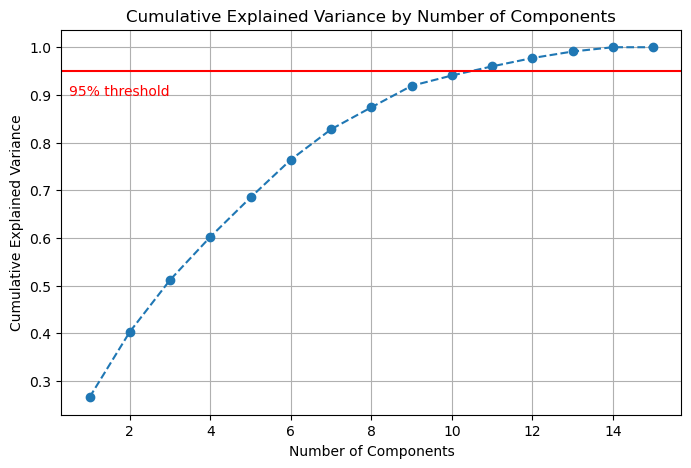

In [30]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-') 
plt.text(0.5, 0.90, '95% threshold', color = 'red')
plt.show()

In [31]:
pca = PCA(n_components=10)
X_pca_final = pca.fit_transform(x)

print("Original data shape:", x.shape)
print("Data shape after PCA:", X_pca_final.shape)

Original data shape: (303, 15)
Data shape after PCA: (303, 10)


C:\Users\rm241\AppData\Local\Temp\ipykernel_12032\1375046390.py:7: UserWarning: Mismatched number of handles and labels: len(handles) = 5 len(labels) = 2
  plt.legend(handles=scatter.legend_elements()[0], labels=['No Disease', 'Has Disease'])


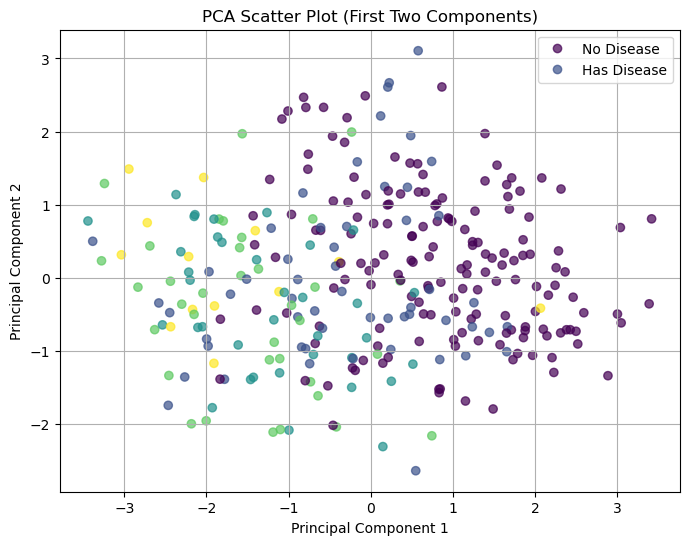

In [32]:

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y, cmap='viridis', alpha=0.7)

plt.title('PCA Scatter Plot (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Disease', 'Has Disease'])
plt.grid(True)
plt.show()

In [33]:
y_binary = [1 if value > 0 else 0 for value in y]

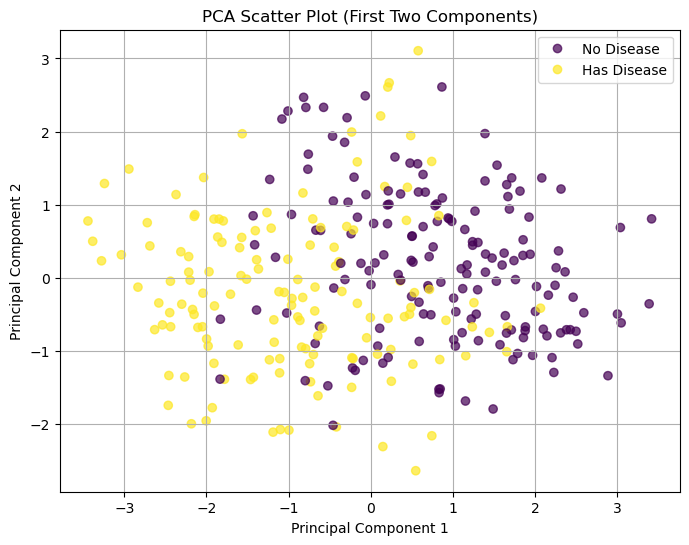

In [34]:

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=y_binary, cmap='viridis', alpha=0.7)

plt.title('PCA Scatter Plot (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Disease', 'Has Disease'])
plt.grid(True)
plt.show()